### Importo i packages

In [0]:
#Import packages
import numpy as np
import pandas as pd
import string
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

### Importo i documenti

In [0]:
reviews = pd.read_csv("tokenizedDataset.csv")
# Campo per visualizzare i commenti lunghi
pd.set_option('display.max_colwidth', -1)
reviews.iloc[1:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,product,title,tokens_stemming,tokens,category,sentiment
1,1,B07DMJPV31,FIFA 19 - PlayStation 4,"['peggior', 'peggior', 'gioc', 'fif', 'ultim', 'anni', 'dovrebb', 'gioc', 'calc', 'pi', 'realist', 'mond', 'tir', 'passagg', 'intervent', 'cpu', 'pur', 'fantascit', 'rimast', 'soddisfatt', 'nemmen', 'precedent', 'capitol', 'fif', 'ora', 'ora', 'rimpiang', 'risparm', 'sold', 'almen', 'fin', 'introdurrann', 'fix', 'bug', 'mes', 'scritt', 'poss', 'situazion', 'peggior', 'ved', 'videogioc', 'ved', 'nemmen', 'circ', 'orfe', 'arriv', 'ver', 'moment', 'pes']","['peggiori', 'peggior', 'gioco', 'fifa', 'ultimi', 'anni', 'dovrebbe', 'gioco', 'calcio', 'pi', 'realistico', 'mondo', 'tiri', 'passaggi', 'interventi', 'cpu', 'pura', 'fantascienza', 'rimasto', 'soddisfatto', 'nemmeno', 'precedente', 'capitolo', 'fifa', 'ora', 'ora', 'rimpiango', 'risparmiate', 'soldi', 'almeno', 'fino', 'introdurranno', 'fix', 'bug', 'mese', 'scritto', 'posso', 'situazione', 'peggiorata', 'vede', 'videogioco', 'vede', 'nemmeno', 'circo', 'orfei', 'arrivato', 'veramente', 'momento', 'pes']",videogames,negative
2,2,B07DMJPV31,FIFA 19 - PlayStation 4,"['ea', 'sa', 'gioc', 'calc', 'difes', 'anno', 'pegg', 'anni', 'terzin', 'marc', 'fas', 'offens', 'central', 'corr', 'fasc', 'lasc', 'liber', 'camp', 'cross', 'difes', 'davver', 'scandal', 'pegg', 'cred', 'possibil', 'parl', 'fut', 'champions', 'poch', 'gioc', 'averc', 'gioc', 'pi', 'arrabb', 'rilass', 'giocator', 'velocit', 'riprend', 'camp', 'apert', 'giocator', 'velocit', 'ripigl', 'nemmen', 'tir', 'are', 'port', 'part', 'nessun', 'via', 'mezz', 'pall', 'pal', 'sembr', 'radiocomand', 'giocator', 'scars', 'sembr', 'fenomen', 'rimpall', 'irreal', 'fisic', 'pallon', 'fantascientif', 'addi', 'fif', 'pes', 'piac', 'almen', 'prov', 'cerc', 'simul', 'part', 'spacc', 'ping', 'ping', 'gioc', 'calc']","['ea', 'sa', 'gioco', 'calcio', 'difesa', 'anno', 'peggio', 'anni', 'terzini', 'marcano', 'fase', 'offensiva', 'centrali', 'corrono', 'fasce', 'lasciando', 'libero', 'campo', 'cross', 'difesa', 'davvero', 'scandalosa', 'peggio', 'credevo', 'possibile', 'parlare', 'fut', 'champions', 'pochi', 'giochi', 'averci', 'giocato', 'pi', 'arrabbiato', 'rilassato', 'giocatori', 'velocit', 'riprendere', 'campo', 'aperto', 'giocatori', 'velocit', 'ripigli', 'nemmeno', 'tiri', 'area', 'porta', 'partita', 'nessuna', 'via', 'mezzo', 'palle', 'pali', 'sembrano', 'radiocomandate', 'giocatori', 'scarsi', 'sembrano', 'fenomeni', 'rimpalli', 'irreali', 'fisica', 'pallone', 'fantascientifica', 'addio', 'fifa', 'pes', 'piace', 'almeno', 'provato', 'cerca', 'simulare', 'partita', 'spaccia', 'ping', 'ping', 'gioco', 'calcio']",videogames,negative
3,3,B07DMJPV31,FIFA 19 - PlayStation 4,"['aspett', 'moment', 'part', 'presuppost', 'rid', 'cop', 'problem', 'ps', 'pro', 'ringraz', 'amazon', 'temp', 'rimbors', 'sold', 'vals', 'pen', 'do', 'stell', 'numer', 'ottim', 'spedizion', 'giorn', 'uscit', 'second', 'stell', 'do', 'tutt', 'licenz', 'contien', 'fif', 'ver', 'fior', 'occhiell', 'rest', 'scriv', 'fatic', 'recension', 'recensor', 'ser', 'acquister', 'spend', 'sold', 'gioc', 'megl', 'risparm', 'giocabilit', 'assurd', 'giocator', 'corr', 'pattin', 'cit', 'nhl', 'fisic', 'pall', 'rotol', 'schizz', 'temp', 'pattin', 'calciator', 'ugual', 'realt', 'sembr', 'fot', 'modell', 'velocit', 'congru', 'realt', 'tropp', 'tropp', 'lent', 'passagg', 'temp', 'lent', 'mov', 'passagg', 'ovver', 'gamb', 'sembr', 'baston', 'gamb', 'scordin', 'sens', 'giocator', 'sann', 'dev', 'pall', 'not', 'gioc', 'pass', 'simul', 'arcad', 'cross', 'sembr', 'robotizz', 'congru', 'realt', 'gamb', 'sembr', 'mov', 'ah', 'altra', 'modalit', 'camp', 'fut', 'ultim', 'team', 'molt', 'bell', 'struttur', 'maggior', 'part', 'compr', 'fif', 'fut', 'stop', 'conclud', 'fif', 'anni', 'part', 'camp', 'rend', 'ugual', 'anno', 'mescol', 'poter', 'fif', 'salv', 'licenz', 'fut', 'ultim', 'team', 'rest', 'ugual', 'noios', 'gameplay', 'realist', 'divertent', 'vend', 'content', 'content', 'rest', 'fat', '

### Trovare le parole positive

In [0]:
positive = reviews[reviews['sentiment'] == 'positive']['tokens_stemming']
pos = list()
for item in positive:
  item = item.replace("'", "")
  pos.append(item.split(','))

### Calcolo le dieci parole più usate nelle recensioni positive


In [0]:
sentences = (list(itertools.chain(pos)))
pos_list = [item for sublist in sentences for item in sublist]
c = Counter(pos_list)
c.most_common(10)

[(' molt', 30959),
 (' gioc', 27380),
 (' pi', 21706),
 (' libr', 16801),
 (' ottim', 16634),
 (' consigl', 15677),
 (' film', 14928),
 (' ben', 13127),
 (' bell', 12483),
 (' arriv', 11811)]

### Rappresentazione grafica delle parole positive

(-0.5, 399.5, 199.5, -0.5)

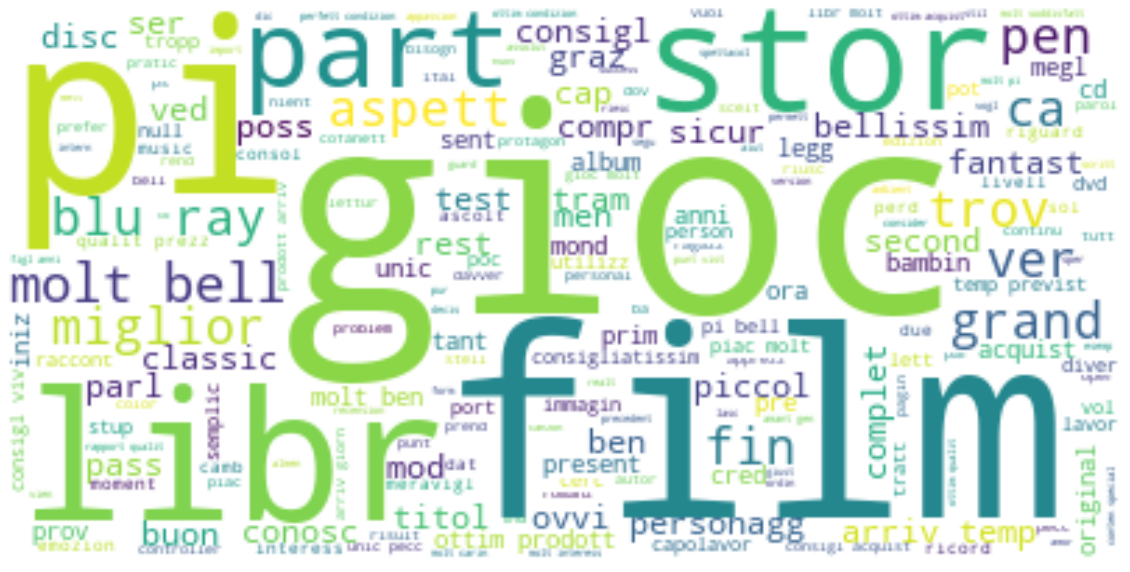

In [0]:
pod_fig = plt.figure(figsize=(20,14))
pos_wordcloud = WordCloud(background_color="white").generate(" ".join(pos_list))
plt.imshow(pos_wordcloud,interpolation='bilinear')
plt.axis("off")

###Trovo le parole negative

In [0]:
negative = reviews[reviews['sentiment'] == 'negative']['tokens_stemming']
neg = list()
for item in negative:
  item = item.replace("'", "")
  neg.append(item.split(','))

### Calcolo le dieci parole più usate nelle recensioni negative



In [0]:
sentences = (list(itertools.chain(neg)))
neg_list = [item for sublist in sentences for item in sublist]
c = Counter(neg_list)
c.most_common(10)

[(' gioc', 3096),
 (' pi', 2789),
 (' libr', 2275),
 (' molt', 2266),
 (' film', 1417),
 (' arriv', 1364),
 (' part', 1057),
 (' acquist', 1044),
 (' ben', 1016),
 (' prodott', 998)]

### Rappresentazione grafica negative

(-0.5, 399.5, 199.5, -0.5)

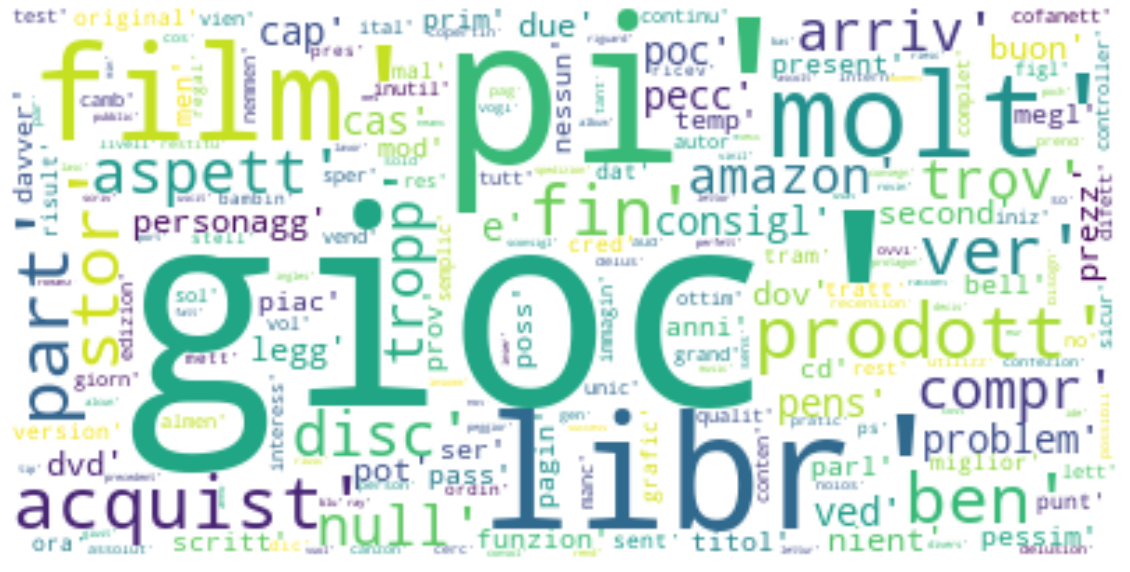

In [0]:
neg_fig = plt.figure(figsize=(20,14))
neg_wordcloud = WordCloud(background_color="white").generate(" ".join(negative))
plt.imshow(neg_wordcloud,interpolation='bilinear')
plt.axis("off")